# Assignment 4-2: Implementation of Matrix in Image Processing

### Setup.

In [14]:
import cv2
import numpy
import math
from matplotlib import pyplot

### Load the image as grayscale, convert bgr->rgb.
Since cv2.imread reads image as bgr and pyplot shows images as rgb, we need conversion.  
https://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading

In [15]:
img = cv2.imread('bif.jpg', 0) # Zero means grayscale. 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

### Define function to show images.
Show loaded image and scaled image @320x320 pixels.

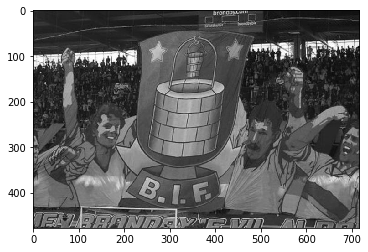

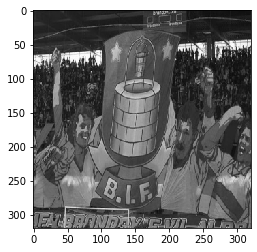

In [16]:
def myimage(image):
    # image view
    pyplot.imshow(image) # shows image as rgb.
    pyplot.show()

myimage(img_gray)
img_gray = cv2.resize(img_gray, (320, 320))
myimage(img_gray)

### Define a function to read image bytes in chunks of e.g 3x3 matrices.
Picture is 320 x 320, ie. 320 arrays each with 320 arrays with 3 ints for r, g and b values.  
img_gray has the dimensions \[320]\[320]\[3].  
Since the picture is in grayscale, values for r, g and b are the same. We will just take the value for r. 
img_gray\[0]\[0] is \[47 47 47], we will take img_gray\[0]\[0]\[0], i.e. 47.  
This value is one part of a 3x3 slice, made up of e.g.  
img_gray\[0]\[0]\[0]...img_gray\[2]\[0]\[0]  
img_gray\[0]\[1]\[0]...img_gray\[2]\[1]\[0]  
img_gray\[0]\[2]\[0]...img.gray\[2]\[2]\[0]  

The slicing is done from left to right, top to bottom.

In [17]:
def slice_image(image:list, matrix_dimension:int, stride:int) -> list:
    width = len(image)
    height = len(image[0])
    slices = []
    slice = []
    for i in range(0, height - matrix_dimension + 1, stride): 
        for j in range(0, width - matrix_dimension + 1, stride):
            slice = [[image[a][b][0] for b in range(j, j + matrix_dimension)]for a in range(i, i + matrix_dimension)]        
            slices.append(slice)
    return slices

### Define function to multiply matrices.

In [18]:
def matrix_mul(slice:list, kernel:list) -> int:
    # slice og kernel skal have samme længde og dybde.
    result = 0
    for a,b in zip(slice, kernel):
        for v1,v2 in zip(a,b):
            result += v1*v2
    return result

### Define function to multiply a list of slices with a kernel.

In [19]:
def mul_with_kernel(slices:list, kernel:list) -> list:
    feature_map:list = []
    # multiply the kernel with slices.
    for x in range(len(slices)):    
        mul_result = int(matrix_mul(slices[x], kernel))
        # normalize result to avoid invalid grayscale.
        normalized = 0 if mul_result < 0 else 255 if mul_result > 255 else mul_result
        to_append = [normalized,normalized, normalized]    
        feature_map.append(to_append)    
    return numpy.array_split(feature_map, math.sqrt(len(feature_map)))


### Define function to return max values from a list of slices.

In [20]:
def max_pool(slices:list) -> list:
    number_of_insertions = 1
    output:list = []
    for slice in slices:
        max_value = numpy.amax(numpy.array(slice).flatten().tolist())        
        output.append([max_value,max_value,max_value])
    return numpy.array_split(output, int(math.sqrt(len(output))))

### Define kernels.

In [21]:
# Define kernel to sharpen image / detect edges.
kernel = [[0,-1,0],
          [-1,5,-1],
          [0,-1,0]]

# Kernel for vertical lines.
v_kernel = [[0,1,0],
[0,1,0],
[0,1,0]]

### Show sharpened image and original image

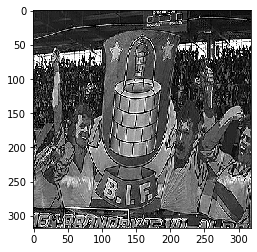

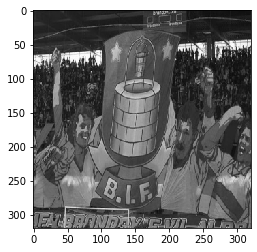

In [22]:
myimage(mul_with_kernel(slice_image(img_gray, 3, 1), kernel))
myimage(img_gray)

### Max pool image
Max pooling er en måde at reducere opløsningen / størrelsen af billedet ved at fjerne såkaldte overrepræsenterede pixels (redundans).  
Det menneskelige øje kan godt lide at se billeder i høj opløsning, men computeren er ligeglad.  
Med et max-pool'et billede vil computeren hurtigere kunne beregne eks. lane-assist.  
  
Vis max_pool billede, sharpened max_pool billede og orig. billede.


original image


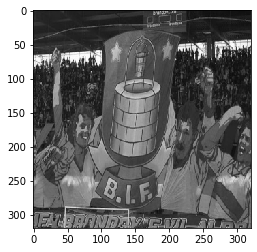

max pooled image


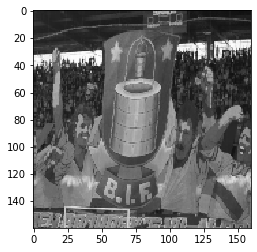

max pooled image with edge detection


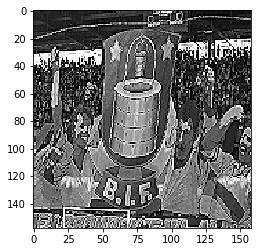

orig image with vertical lines


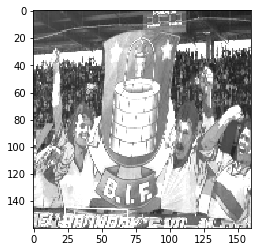

In [23]:
print("original image")
myimage(img_gray)
orig_slices = slice_image(img_gray,2,2)
max_pooled_image = max_pool(orig_slices)
print("max pooled image")
myimage(max_pooled_image)

# slice the max pooled image and multiply with edge detection kernel.
max_pooled_slices = slice_image(max_pooled_image,3,1)
print("max pooled image with edge detection")
myimage(mul_with_kernel(max_pooled_slices, kernel))
print("orig image with vertical lines")
myimage(mul_with_kernel(orig_slices, v_kernel))
